In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

x=cancer.data
y=cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [0]:
class SingleLayer:
  
  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses =[]
    #new 5-2
    self.val_losses=[]
    #    
    self.w_history = []
    self.lr = learning_rate
    #5-3
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(slef, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0],1)), x]

  def activation(self, z):
    a= 1/(1+np.exp(-z))
    return a

  #new 5-2
  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss =0
    for i in range(len(x_val)):
      z=self.forpass(x_val[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())
  #
  #5-3
  def reg_loss(self):
    return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)
  #
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])
    self.b =0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z= self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i]-a)
        w_grad, b_grad = self.backprop(x[i], err)
        #5-3
        w_grad += self.l1*np.sign(self.w)+self.l2*self.w
        self.w -= self.lr*w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y) + self.reg_loss())
      #new
      self.update_val_loss(x_val,y_val)
  
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [0]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train- train_mean)/train_std

x_val_scaled = (x_val- train_mean)/train_std

In [0]:
layer3=SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

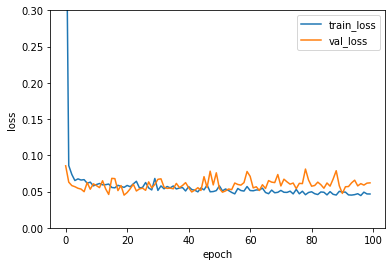

In [6]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [7]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [17]:
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

In [19]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [24]:
#5-4 K_validation
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty = 'l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724
